In [29]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolToFile
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
IPythonConsole.ipython_useSVG=True

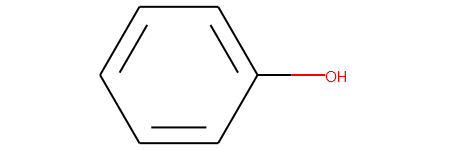

In [29]:
image=Chem.MolFromSmiles('c1ccccc1O')
image

In [30]:
MolToFile(image,fileName='c1ccccc1O.png',size=(100, 100),imageType='png')

In [ ]:
def transform_to_canonical_smiles(df,smiles):
canonical_smiles=[]
for item in df.smiles:
    try:
        canonical_smiles.append(Chem.CanonSmiles(smi=item))
    except:
        canonical_smiles.append('null')
return canonical_smiles

In [104]:
#import
path='../../DrugDiscoveryML/python/chembl_24_bbb2.csv'
file_original=path.split('/')[-1]
initialdata=pd.read_csv(path)
smiles=initialdata.canonical_smiles#.head(5)#test purposes
smiles.drop_duplicates()

0                                 ClCCCl
1                               c1ccccc1
2                                  CCCCO
3                               CCCCCCCC
4         CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1
5                                    CCO
6                                     CO
7                                    N#N
8                                   CCCO
9                              Cc1ccccc1
10                    CC(=O)Nc1ccc(O)cc1
11         CC(C)(C)NCC(O)c1ccc(O)c(CO)c1
12                 CC(=O)Oc1ccccc1C(=O)O
13              CCC1(CC)C(=O)NC(=O)NC1=O
14                   CCOC(=O)c1ccc(N)cc1
15                          CNCCc1ccccn1
16      CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1
17           CC(C)(C)NCC(O)COc1ccccc1C#N
18                 CCCCOC(=O)c1ccc(N)cc1
19                        CC(N)Cc1ccccc1
20                       CCCC(CCC)C(=O)O
21                   FC(F)OC(F)(F)C(F)Cl
22                                 CCOCC
23                       FC(F)(F)C(Cl)Br
24     CN1C(=O)N

In [23]:
m = Chem.MolFromSmiles(smiles[0])
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(m)
contribs

[(0.6895, 5.853), (-0.2035, 2.753), (-0.2035, 2.753), (0.6895, 5.853)]

idea from [here](https://github.com/rdkit/rdkit/blob/master/Docs/Book/GettingStartedInPython.rst)

In [110]:
def from_smiles_to_descriptors(smiles):
    result=[]
    for smile in smiles:
        m = Chem.MolFromSmiles(smile)
        result.append({'smiles':smile, 'TPSA':Descriptors.TPSA(m),'MolLogP':Descriptors.MolLogP(m),'MolMR':Descriptors.MolMR(m),
                     'BalabanJ':Descriptors.BalabanJ(m),'BertzCT':Descriptors.BertzCT(m),
                      'Ipc':Descriptors.Ipc(m),'HallKierAlpha':Descriptors.HallKierAlpha(m),
                      'Kappa1':Descriptors.Kappa1(m),'Kappa2':Descriptors.Kappa2(m),
                      'Kappa3':Descriptors.Kappa3(m),'Chi0':Descriptors.Chi0(m),
                      'Chi1':Descriptors.Chi1(m),'Chi0n':Descriptors.Chi0n(m),
                      'HeavyAtomCount':Descriptors.HeavyAtomCount(m),'HeavyAtomMolWt':Descriptors.HeavyAtomMolWt(m),
                      'NHOHCount':Descriptors.NHOHCount(m),'Chi3n':Descriptors.Chi3n(m),'Chi4n':Descriptors.Chi4n(m),
                      'MolWt':Descriptors.MolWt(m),'ExactMolWt':Descriptors.ExactMolWt(m),'NOCount':Descriptors.NOCount(m),
                      'NumHAcceptors':Descriptors.NumHAcceptors(m),'NumHDonors':Descriptors.NumHDonors(m),
                      'NumHeteroatoms':Descriptors.NumHeteroatoms(m),'SlogP_VSA1':Descriptors.SlogP_VSA1(m),
                      'NumSaturatedHeterocycles':Descriptors.NumSaturatedHeterocycles(m),
                      'NumRadicalElectrons':Descriptors.NumRadicalElectrons(m),'qed':Descriptors.qed(m),
                      'NumRotatableBonds':Descriptors.NumRotatableBonds(m),'NumValenceElectrons':Descriptors.NumValenceElectrons(m),
                      'RingCount':Descriptors.RingCount(m),'FractionCSP3':Descriptors.FractionCSP3(m),
                      'LabuteASA':Descriptors.LabuteASA(m),'NumSaturatedRings':Descriptors.NumSaturatedRings(m),
                      'NumSaturatedCarbocycles':Descriptors.NumSaturatedCarbocycles(m),
                      'NumAromaticCarbocycles':Descriptors.NumAromaticCarbocycles(m),'NumAliphaticCarbocycles':Descriptors.NumAliphaticCarbocycles(m),
                      'NumAliphaticHeterocycles':Descriptors.NumAliphaticHeterocycles(m),'NumAliphaticRings':Descriptors.NumAliphaticRings(m),
                      'NumValenceElectrons ':Descriptors.NumValenceElectrons(m),'PEOE_VSA1':Descriptors.PEOE_VSA1(m),
                      'EState_VSA1':Descriptors.EState_VSA1(m),'VSA_EState1':Descriptors.VSA_EState1(m),'FpDensityMorgan1':Descriptors.FpDensityMorgan1(m),
                      'MaxAbsPartialCharge':Descriptors.MaxAbsPartialCharge(m),'fr_Al_COO':Descriptors.fr_Al_COO(m)})
    data=pd.DataFrame(result)
    return data
    
df=from_smiles_to_descriptors(smiles)
df

,BalabanJ,BertzCT,Chi0,Chi0n,Chi1,Chi3n,Chi4n,EState_VSA1,ExactMolWt,FpDensityMorgan1,...,NumValenceElectrons,NumValenceElectrons,PEOE_VSA1,RingCount,SlogP_VSA1,TPSA,VSA_EState1,fr_Al_COO,qed,smiles
0,1.974745,6.000000,3.414214,2.170143,1.914214,0.071429,0.000000,0.000000,97.969005,1.000000,...,26,26,0.000000,0,0.000000,0.00,0.0,0,0.436304,ClCCCl
1,3.000000,71.961005,4.242641,3.464102,3.000000,0.666667,0.384900,0.000000,78.046950,0.333333,...,30,30,0.000000,1,0.000000,0.00,0.0,0,0.442628,c1ccccc1
2,2.190610,11.119415,4.121320,3.568534,2.414214,0.511667,0.158114,0.000000,74.073165,1.600000,...,32,32,5.106527,0,0.000000,20.23,0.0,0,0.512822,CCCCO
3,2.530060,25.019550,6.242641,6.242641,3.914214,1.457107,0.853553,0.000000,114.140851,0.625000,...,50,50,0.000000,0,0.000000,0.00,0.0,0,0.480611,CCCCCCCC
4,2.784739,381.764138,12.344935,10.172964,7.293512,2.151937,1.606813,0.000000,239.107692,1.375000,...,88,88,5.316789,1,5.316789,29.10,0.0,0,0.820494,CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1
5,1.632993,2.754888,2.707107,2.154320,1.414214,0.000000,0.000000,0.000000,46.041865,2.000000,...,20,20,5.106527,0,0.000000,20.23,0.0,0,0.406808,CCO
6,1.000000,2.000000,2.000000,1.447214,1.000000,0.000000,0.000000,0.000000,32.026215,1.500000,...,14,14,5.106527,0,0.000000,20.23,0.0,0,0.385284,CO
7,3.000000,4.754888,2.000000,0.894427,1.000000,0.000000,0.000000,0.000000,28.006148,1.000000,...,10,10,0.000000,0,0.000000,47.58,0.0,0,0.351583,N#N
8,1.974745,5.245112,3.414214,2.861427,1.914214,0.223607,0.000000,0.000000,60.057515,1.750000,...,26,26,5.106527,0,0.000000,20.23,0.0,0,0.463784,CCCO
9,3.021465,129.965660,5.112884,4.386751,3.393847,0.940456,0.534378,0.000000,92.062600,1.000000,...,36,36,0.000000,1,0.000000,0.00,0.0,0,0.458806,Cc1ccccc1


In [111]:
df.to_csv('rdkit_'+file_original,index=False)